<a href="https://colab.research.google.com/github/Namesakenberg/machine_learning/blob/main/logistic_regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [10]:
X = df[['Age','Fare']]
y = df['Survived']

In [11]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)
predicted = log_reg.predict_proba(X)[:,1] # probability of every point to be in class 1 (probability of survived)
odds = predicted / (1-predicted)    # clculate odds
log_odds = np.log(odds)   #calculate log(odds)

Text(0, 0.5, 'Log-odds')

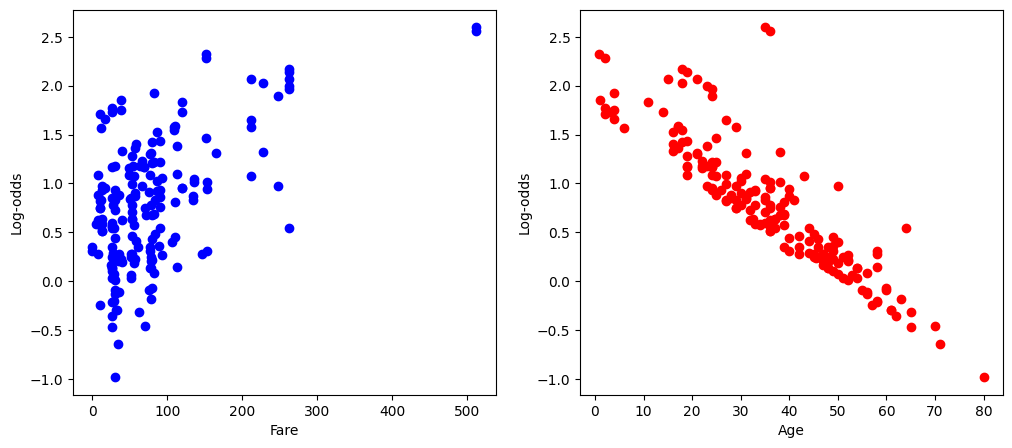

In [12]:
# check if linear relation exisits between independent variable X and the log(odds)

# plot fare vs log(odds)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].scatter(x=X['Fare'].values, y=log_odds, color='blue')
ax[0].set_xlabel("Fare")
ax[0].set_ylabel("Log-odds")

# plot age vs log(odds)
ax[1].scatter(x=X['Age'].values, y=log_odds, color='red')
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Log-odds")

In [2]:
# the relation of the Age with log(odds) of survival is linear which is good , but it has a non linear relationship with the fair column ,
# for logistic regression to give the best results we need both the input columns linearly related to the log(odds)